# Post Clustering EDA
---

#### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# from google.colab import drive
# drive.mount('/content/drive')

#### Read-In

In [2]:
trans_cluster = pd.read_csv('/content/drive/MyDrive/data/transaction_clustered.csv', index_col=False)
trans_cluster = trans_cluster.iloc[:, 1:]

price_cluster = pd.read_csv('/content/drive/MyDrive/data/price_data_merged_clustered.csv', index_col = 'Date', parse_dates=True)


## Cluster Analysis

### Transaction Clusters

In [3]:
trans_cluster.corr(numeric_only=True)

,blockNumber,timeStamp,nonce,transactionIndex,value,gasPrice,isError,cumulativeGasUsed,gasUsed,confirmations,...,ethValusd,volatility,dayChange,perc75_Neg,perc75_Neg_lag1,perc75_Neg_lag2,perc75_Neg_lag3,get_out_metric,valueUSD,cluster_label
blockNumber,1.000000,0.999829,0.066913,-0.090281,0.004414,-0.016825,0.001227,0.230492,0.296510,-0.999999,...,0.765120,0.301468,-0.011950,0.150113,0.146473,0.140592,0.114442,0.171696,0.005025,-0.690389
timeStamp,0.999829,1.000000,0.066547,-0.086115,0.005525,-0.010622,0.001307,0.234892,0.299567,-0.999838,...,0.766617,0.304045,-0.010395,0.151703,0.148807,0.142803,0.117403,0.174885,0.006295,-0.682314
nonce,0.066913,0.066547,1.000000,-0.082390,-0.003831,-0.001892,-0.013368,-0.059213,0.043174,-0.066859,...,0.033728,-0.023040,0.010641,-0.022620,-0.025493,-0.025582,-0.022716,-0.031506,-0.004848,-0.072715
transactionIndex,-0.090281,-0.086115,-0.082390,1.000000,0.057841,0.137722,0.008560,0.731815,-0.069781,0.090288,...,0.150252,0.200576,0.100371,0.062405,0.083754,0.104784,0.140569,0.139406,0.064165,0.313570
value,0.004414,0.005525,-0.003831,0.057841,1.000000,0.053791,-0.004158,0.048455,-0.027163,-0.004391,...,0.058200,0.069404,0.006868,0.056980,0.050821,0.069831,0.054063,0.074460,0.974732,-0.026799
gasPrice,-0.016825,-0.010622,-0.001892,0.137722,0.053791,1.000000,-0.032825,0.106485,0.191003,0.016674,...,0.155140,0.227687,0.068430,0.080257,0.111136,0.100242,0.149799,0.153333,0.060035,0.285414
isError,0.001227,0.001307,-0.013368,0.008560,-0.004158,-0.032825,1.000000,0.021386,-0.012789,-0.001253,...,-0.025159,-0.022409,-0.004482,-0.014508,-0.018501,-0.018699,-0.018257,-0.023648,-0.004726,-0.018487
cumulativeGasUsed,0.230492,0.234892,-0.059213,0.731815,0.048455,0.106485,0.021386,1.000000,0.092607,-0.230553,...,0.339917,0.234082,0.081799,0.078286,0.092736,0.108899,0.133318,0.142159,0.053796,0.047572
gasUsed,0.296510,0.299567,0.043174,-0.069781,-0.027163,0.191003,-0.012789,0.092607,1.000000,-0.296855,...,0.080794,-0.075960,-0.000543,-0.079747,-0.098815,-0.091751,-0.084999,-0.117701,-0.030841,-0.292029
confirmations,-0.999999,-0.999838,-0.066859,0.090288,-0.004391,0.016674,-0.001253,-0.230553,-0.296855,1.000000,...,-0.764905,-0.301285,0.011972,-0.150024,-0.146370,-0.140492,-0.114337,-0.171564,-0.005000,0.690422


In [4]:
trans_cluster['cluster_label'].value_counts()

cluster_label
 0    57228
 1    49665
 2     9660
-1      204
 3      114
 5       14
 6       11
 4       10
Name: count, dtype: int64

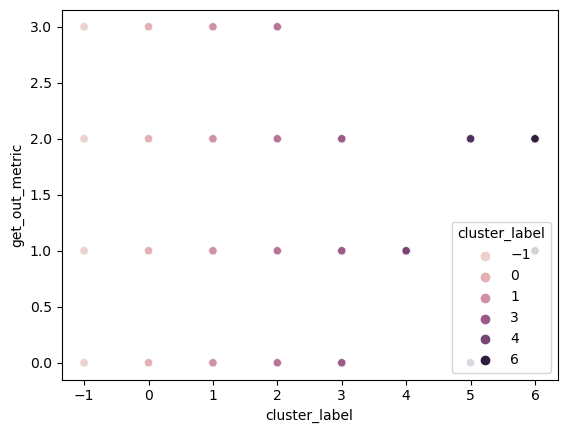

In [5]:
sns.scatterplot(x = trans_cluster['cluster_label'], y = trans_cluster['get_out_metric'], data = trans_cluster, hue = 'cluster_label');

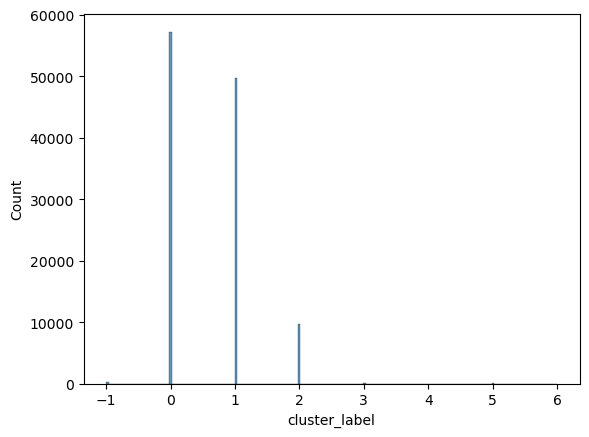

In [6]:
sns.histplot(trans_cluster['cluster_label']);


### Price Per Day Clusters

In [7]:
price_cluster[['Close', 'volatility', 'dayChange', 'perc75_Neg', 'perc75_Neg_lag1',	'perc75_Neg_lag2', 'cluster']].corr()

,Close,volatility,dayChange,perc75_Neg,perc75_Neg_lag1,perc75_Neg_lag2,cluster
Close,1.000000,0.710240,0.032945,0.395105,0.397795,0.398842,-0.331981
volatility,0.710240,1.000000,0.065556,0.485544,0.467442,0.434316,-0.286180
dayChange,0.032945,0.065556,1.000000,-0.509635,0.044809,0.020149,-0.001866
perc75_Neg,0.395105,0.485544,-0.509635,1.000000,0.331779,0.277704,-0.205188
perc75_Neg_lag1,0.397795,0.467442,0.044809,0.331779,1.000000,0.331779,-0.198756
perc75_Neg_lag2,0.398842,0.434316,0.020149,0.277704,0.331779,1.000000,-0.217771
cluster,-0.331981,-0.286180,-0.001866,-0.205188,-0.198756,-0.217771,1.000000


In [8]:
price_cluster['cluster'].value_counts()

cluster
-1     1623
 11     372
 1      133
 8       95
 6        8
 4        6
 5        6
 7        5
 9        5
 0        3
 2        3
 3        3
 10       3
 12       3
 13       3
Name: count, dtype: int64

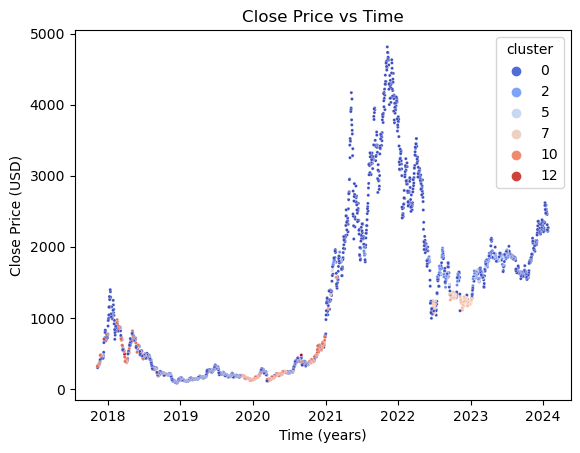

In [9]:
sns.scatterplot(x = price_cluster.index, y = price_cluster['Close'], data = price_cluster, hue = 'cluster' , palette = 'coolwarm', s = 5)
plt.title('Close Price vs Time')
plt.xlabel('Time (years)')
plt.ylabel('Close Price (USD)');
plt.savefig('../images/timecluster1.png')

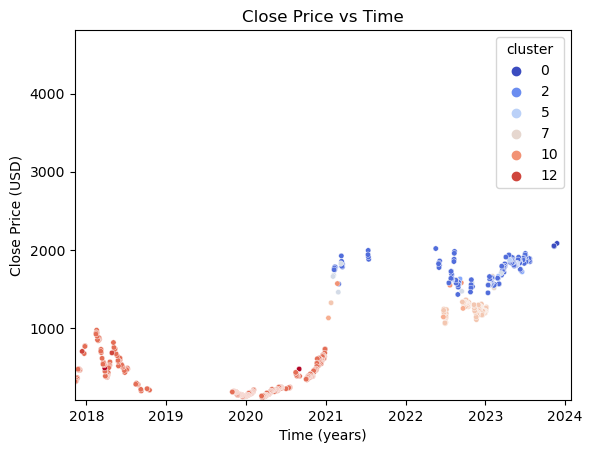

In [10]:
temp_df = price_cluster[price_cluster['cluster'] > -1]

sns.scatterplot(x = temp_df.index, y = temp_df['Close'], data = temp_df, hue = 'cluster' , palette = 'coolwarm', s = 15)
plt.title('Close Price vs Time')
plt.xlabel('Time (years)')
plt.ylabel('Close Price (USD)')
plt.xlim(price_cluster.index.min(), price_cluster.index.max())
plt.ylim(price_cluster['Close'].min(), price_cluster['Close'].max());
plt.savefig('../images/timecluster2.png')

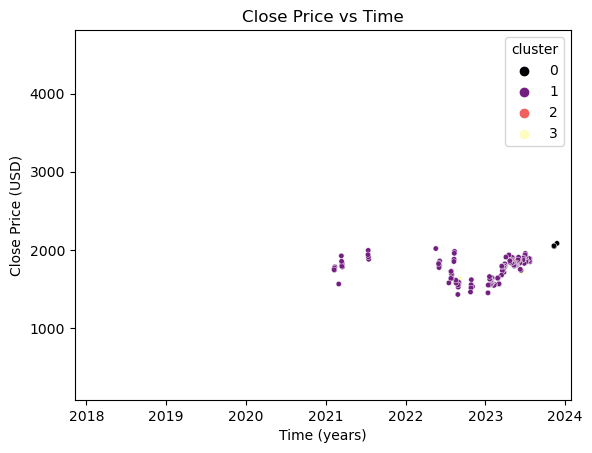

In [11]:
temp_df = price_cluster[(price_cluster['cluster'] == 0) | (price_cluster['cluster'] == 1) | (price_cluster['cluster'] == 2) | (price_cluster['cluster'] == 3)]

sns.scatterplot(x = temp_df.index, y = temp_df['Close'], data = temp_df, hue = 'cluster' , palette = 'magma', s = 15)
plt.title('Close Price vs Time')
plt.xlabel('Time (years)')
plt.ylabel('Close Price (USD)')
plt.xlim(price_cluster.index.min(), price_cluster.index.max())
plt.ylim(price_cluster['Close'].min(), price_cluster['Close'].max());
plt.savefig('../images/timecluster3.png')

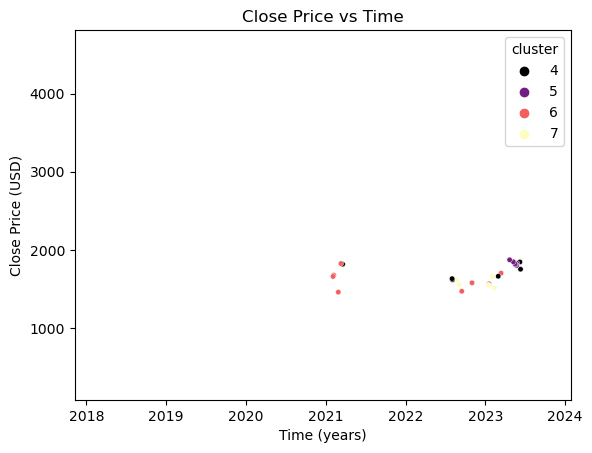

In [12]:
temp_df = price_cluster[(price_cluster['cluster'] == 4) | (price_cluster['cluster'] == 5) | (price_cluster['cluster'] == 6) | (price_cluster['cluster'] == 7)]

sns.scatterplot(x = temp_df.index, y = temp_df['Close'], data = temp_df, hue = 'cluster' , palette = 'magma', s = 15)
plt.title('Close Price vs Time')
plt.xlabel('Time (years)')
plt.ylabel('Close Price (USD)');
plt.xlim(price_cluster.index.min(), price_cluster.index.max())
plt.ylim(price_cluster['Close'].min(), price_cluster['Close'].max());
plt.savefig('../images/timecluster4.png')

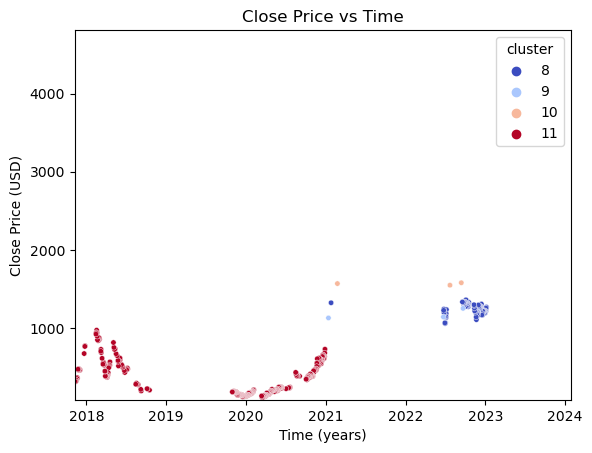

In [13]:
temp_df = price_cluster[(price_cluster['cluster'] == 8) | (price_cluster['cluster'] == 9) | (price_cluster['cluster'] == 10) | (price_cluster['cluster'] == 11)]

sns.scatterplot(x = temp_df.index, y = temp_df['Close'], data = temp_df, hue = 'cluster' , palette = 'coolwarm', s = 15)
plt.title('Close Price vs Time')
plt.xlabel('Time (years)')
plt.ylabel('Close Price (USD)')
plt.xlim(price_cluster.index.min(), price_cluster.index.max())
plt.ylim(price_cluster['Close'].min(), price_cluster['Close'].max())
plt.savefig('../images/timecluster5.png');

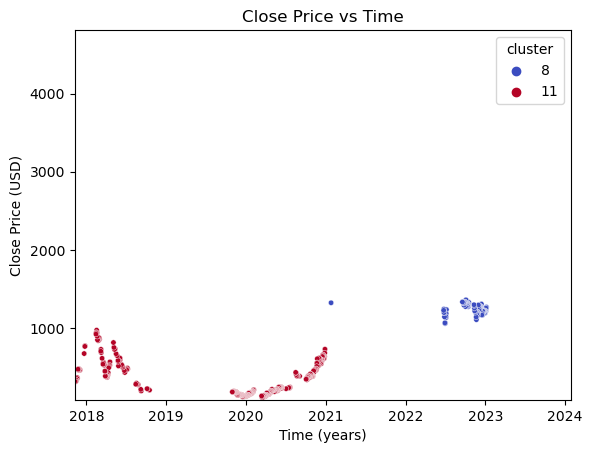

In [14]:
temp_df = price_cluster[(price_cluster['cluster'] == 8) |(price_cluster['cluster'] == 11)]

sns.scatterplot(x = temp_df.index, y = temp_df['Close'], data = temp_df, hue = 'cluster' , palette = 'coolwarm', s = 15)
plt.title('Close Price vs Time')
plt.xlabel('Time (years)')
plt.ylabel('Close Price (USD)')
plt.xlim(price_cluster.index.min(), price_cluster.index.max())
plt.ylim(price_cluster['Close'].min(), price_cluster['Close'].max())
plt.savefig('../images/timecluster6.png');

In [15]:
clustered_dates = list(price_cluster[(price_cluster['cluster'] == 8) |(price_cluster['cluster'] == 11)].index)
formatted_dates = [date.strftime('%Y-%m-%d') for date in clustered_dates]
len(formatted_dates)

467

In [16]:
time_clustered_addresses = trans_cluster[trans_cluster['dateOnly'].isin(formatted_dates)]

time_clustered_addresses['from'].value_counts()

from
0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88    115
0xda7357bbce5e8c616bc7b0c3c86f0c71c5b4eabb    101
0x4e5b2e1dc63f6b91cb6cd759936495434c7e972f      3
Name: count, dtype: int64